#  <span style="color:blue">AutoML com Pycaret</span>


## 1.1 Instalando o PyCaret

#### Instalando o PyCaret 
`!pip install pycaret`


## 1.2 Pré-Requisitos
- Python 3.6 ou superior
- Conexão com a internet para carregar dados a partir do repositório do Pycaret.

## 1.3 No Google colab execute:
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

#### Carregando o módulo de classificação e a função para buscar dados.

In [2]:
from pycaret.classification import *
from pycaret.datasets import get_data
import pandas as pd

# Conjunto de dados utilizado.

vamos utilizar o dataset **Income** disponível no repositório do Pycaret.

Este conjunto de dados contém dados de pessoas e o objetivo é estimar se uma determinada pessoa recebe um salário anual maior que 50 mil ou não. Segue abaixo os atributos do conjunto de dados.

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Documentação do Pycaret para os conjuntos de dados.
A listagem de conjuntos de dados disponíveis no repositório do Pycaret __[aqui](https://pycaret.org/get-data/)__ 

#### Carregando os dados.

In [3]:
dataset = get_data('income')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Verificando o objeto.

In [4]:
type(dataset)

pandas.core.frame.DataFrame

#### Verificando a forma dos dados.

In [5]:
dataset.shape

(32561, 14)

#### Verificando as informações dos atributos.

In [6]:
dataset.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
dataset.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
count,32561.000000,30725,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561.000000
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


#### Listando registros missing por atributo.

In [9]:
dataset.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

# Modelagem

#### Separando os dados de validação.

##### Selecionando 95% dos dados dados de forma aleatória.

In [10]:
data = dataset.sample(frac=0.95, random_state=786)

##### Atribuindo os 5% restante para o dataframe de validação.

In [11]:
data_validation = dataset.drop(data.index)

##### Excluindo os demais registros.

In [12]:
data.reset_index(inplace=True, drop=True)
data_validation.reset_index(inplace=True, drop=True)

##### Dados utilizados para modelagem e validação.

In [13]:
print('Dados para modelagem: ' + str(data.shape))
print('Dados reservados para a validação: ' + str(data_validation.shape))

Dados para modelagem: (30933, 14)
Dados reservados para a validação: (1628, 14)


# Configurando o ambiente com a função Setup.

Função Setup inicializa o ambiente no Pycaret e cria o pipeline de transformação e prepara os dados para modelagem e deploy.

In [14]:
exp_clf01 = setup(data = data, target = 'income >50K', session_id=123)

,Description,Value
0,Session id,123
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(30933, 14)"
4,Transformed data shape,"(30933, 64)"
5,Transformed train set shape,"(21653, 64)"
6,Transformed test set shape,"(9280, 64)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,8


Analisando os parametros do experimento criado.

- **session_id :**  Um número aleatório que é passado a todas as funções para garantir a reproducibilidade. Se não especificar o número é passado um padrão.<br/>
<br/>
- **Target Type :**  Binary ou Multiclass. O tipo do atributo alvo é automaticamente detectado.<br/>
<br/>
- **Label Encoded :**  Se o atributo alvo é categorico os valores são codificados utilizando o Label Encoded e é exibido esse mapeamento.<br/>
<br/>
- **Original Data :**  Exibe o shape do dataset original. <br/>
<br/>
- **Missing Values :**  Indica se existe Registros Missing. 
<br/>
<br/>
- **Numeric Features :**  O númerio de features inferidas como numéric. <br/>
<br/>
- **Categorical Features :**  O númerio de features inferidas como categoricas. <br/>
<br/>
- **Transformed Train Set :**  Exibe o shape do conjunto de treino transformado. Detalhe para o número de features.<br/>
<br/>
- **Transformed Test Set :**  Exibe o shape do conjunto de teste transformado. A divisão de quantidade de dados para treino e teste é 70/30 por padrão.<br/>

# Comparando modelos

Esta função treina e compara a performance de todos os modelos para a determinada tarefa escolhida (Classificação, Regressão, Clustering etc) utilizando cross validation e retorna as métricas para avaliação e o tempo de treinamento.

In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8494,0.9033,0.5912,0.7335,0.6546,0.5598,0.5652,2.2510
knn,K Neighbors Classifier,0.8440,0.8587,0.5677,0.7271,0.6374,0.5400,0.5468,2.7460
lda,Linear Discriminant Analysis,0.8398,0.8925,0.5587,0.7153,0.6271,0.5271,0.5338,1.3140
ridge,Ridge Classifier,0.8384,0.0000,0.4983,0.7484,0.5979,0.5019,0.5184,1.2500
et,Extra Trees Classifier,0.8171,0.8731,0.3577,0.7562,0.4855,0.3912,0.4318,1.3770
nb,Naive Bayes,0.8092,0.8967,0.8081,0.5748,0.6717,0.5426,0.5583,1.1930
svm,SVM - Linear Kernel,0.7948,0.0000,0.5725,0.5971,0.5586,0.4309,0.4473,1.1980
rf,Random Forest Classifier,0.7841,0.7944,0.1239,0.8749,0.2166,0.1669,0.2778,1.2680
ada,Ada Boost Classifier,0.7634,0.8348,0.0383,0.6876,0.0723,0.0477,0.1201,1.2860
dummy,Dummy Classifier,0.7586,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3140


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

##### Verificando o retorno da função.

In [16]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Criando o Modelo

Esta função treina o modelo especificado utilizando cross validation e retorna suas métricas.

### Light Gradient Boosting Machine	

In [17]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7576,0.7853,0.0287,0.4688,0.0541,0.0270,0.0650
1,0.7613,0.8172,0.0344,0.6000,0.0651,0.0399,0.0993
2,0.7470,0.7146,0.0402,0.3134,0.0712,0.0173,0.0300
3,0.7626,0.7342,0.0364,0.6333,0.0688,0.0438,0.1087
4,0.7533,0.7645,0.0230,0.3333,0.0430,0.0123,0.0280
5,0.7561,0.4563,0.0268,0.4242,0.0504,0.0223,0.0531
6,0.7580,0.7296,0.0172,0.4737,0.0332,0.0166,0.0510
7,0.7594,0.7334,0.0153,0.5714,0.0298,0.0174,0.0622
8,0.7566,0.7581,0.0191,0.4167,0.0366,0.0157,0.0433


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Verificando o objeto criado.

In [18]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# Otimização do Modelo

Esta função automaticamente otimiza os hiperparametros do modelo usando Random Grid Search em um espaço de busca predefinido.

 **Ferramentas para otimização de parametros**
* http://hyperopt.github.io/hyperopt/
* https://optuna.org/

In [18]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7608,0.8639,0.0363,0.5758,0.0683,0.0409,0.0972
1,0.7632,0.8813,0.0363,0.6786,0.0690,0.0455,0.1169
2,0.7581,0.8619,0.0382,0.4878,0.0709,0.0371,0.0800
3,0.7672,0.8700,0.0402,0.8750,0.0769,0.0569,0.1569
4,0.7640,0.8550,0.0460,0.6486,0.0859,0.0557,0.1256
5,0.7621,0.8751,0.0229,0.7500,0.0445,0.0306,0.1025
6,0.7630,0.8767,0.0306,0.7273,0.0587,0.0400,0.1150
7,0.7626,0.8804,0.0268,0.7368,0.0517,0.0353,0.1089
8,0.7617,0.8615,0.0344,0.6207,0.0652,0.0409,0.1032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Verificando o objeto criado

In [19]:
print(tuned_lgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


Personalizando a busca por hiperparametros.

In [20]:
import numpy as np
params = {
    'n_estimators': np.arange(100,500,50),
    'max_depth': [-1,3,5,10],
    'num_leaves': np.arange(50,120,10)
}

In [21]:
params

{'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]),
 'max_depth': [-1, 3, 5, 10],
 'num_leaves': array([ 50,  60,  70,  80,  90, 100, 110])}

#### Realizando o tunning do algoritmo.

In [22]:
tuned_lgbm2 = tune_model(lgbm, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7627,0.8155,0.0402,0.6364,0.0755,0.0483,0.1148
1,0.7613,0.8385,0.0306,0.6154,0.0583,0.0362,0.0963
2,0.7608,0.8107,0.0363,0.5758,0.0683,0.0409,0.0972
3,0.7677,0.8293,0.0402,0.9130,0.0771,0.0579,0.1628
4,0.7598,0.8177,0.0287,0.5357,0.0545,0.0308,0.0788
5,0.7630,0.8318,0.0249,0.8125,0.0482,0.0344,0.1151
6,0.7635,0.8393,0.0268,0.8235,0.0519,0.0372,0.1210
7,0.7612,0.8379,0.0268,0.6364,0.0514,0.0325,0.0935
8,0.7607,0.8182,0.0306,0.5926,0.0582,0.0353,0.0922


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [23]:
print(tuned_lgbm2)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# Exibindo graficamente a performance do modelo

Com esta função podemos analisar a performance do modelo através de gráficos.

### Feature Importance Plot

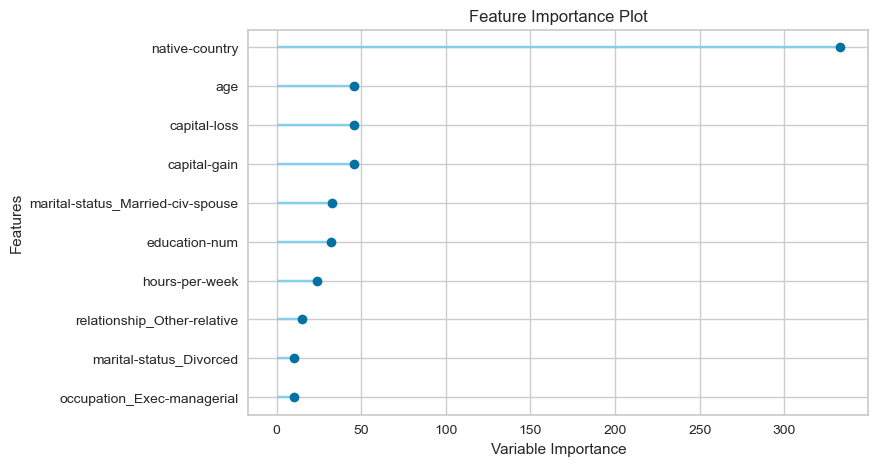

In [24]:
plot_model(tuned_lgbm2, plot='feature')

### Matriz de confusão

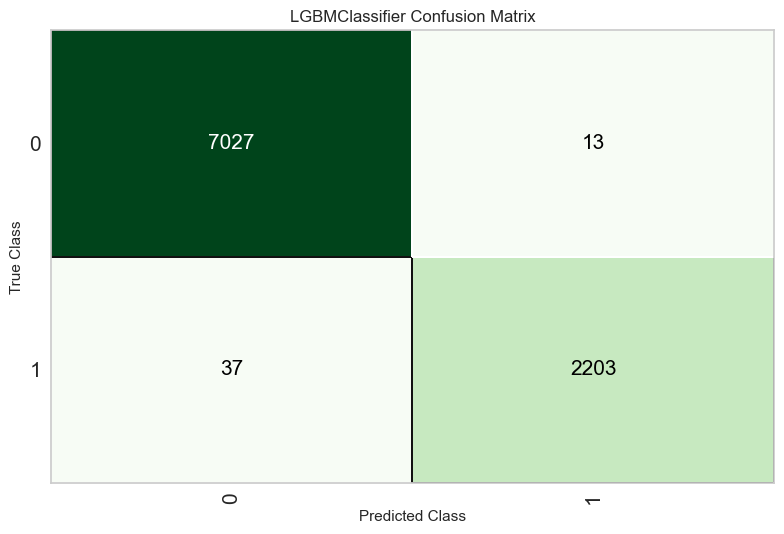

In [25]:
plot_model(tuned_lgbm2, plot = 'confusion_matrix')

A função evaluate_model exibe uma interface o usuário selecionar os gráficos disponíveis para um determinado modelo.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

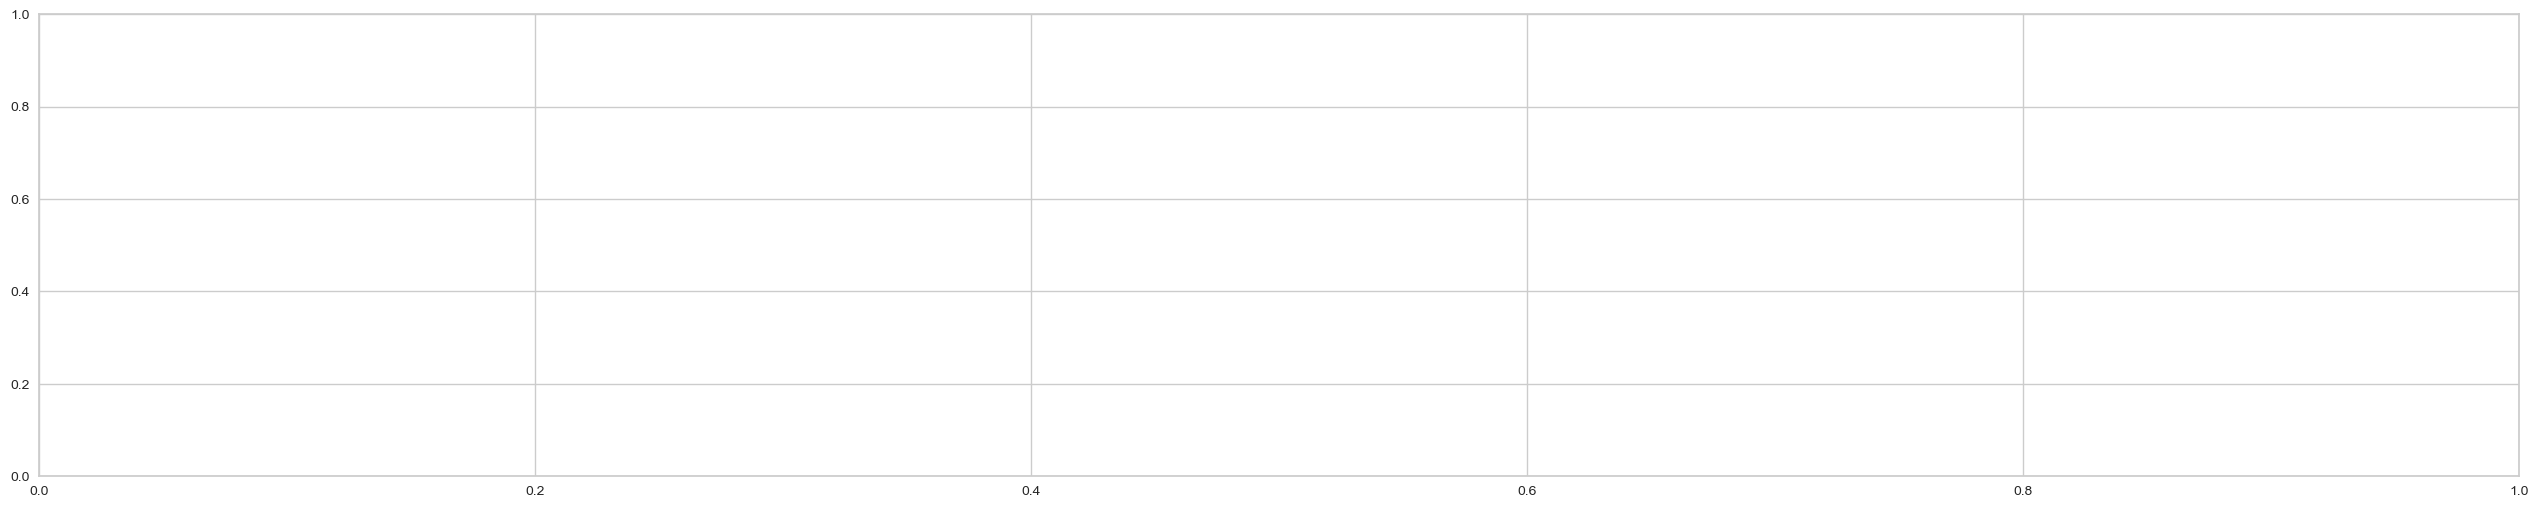

In [26]:
evaluate_model(tuned_lgbm2)

# Predict utilizando a amostra de teste.

Esta função realiza a predição utilizando o modelo especificado utilizando a amostra separada de teste.

In [27]:
predict_model(tuned_lgbm2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9946,0.9998,0.9835,0.9941,0.9888,0.9852,0.9853


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,prediction_label,prediction_score
5796,69,NaN,Prof-school,15,Divorced,NaN,Not-in-family,White,Male,0,0,5,United-States,0,0,0.9992
29710,34,Self-emp-inc,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,0,0,0.9993
19776,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0,0.9993
22545,35,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0,0.9988
14501,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,0,0,0.9701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,30,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Poland,0,0,0.8388
29606,52,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,0,0,0.9993
12633,28,State-gov,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,0,0,0.9990
5835,38,Local-gov,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,2258,60,United-States,0,0,0.9989


# Predict utilizando os dados de validação.

In [28]:
validation_predictions = predict_model(tuned_lgbm2, data=data_validation)
validation_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9969,0.9999,0.9946,0.9920,0.9933,0.9913,0.9913


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,prediction_label,prediction_score
0,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0,0.9984
1,48,Self-emp-not-inc,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0,0,0.9988
2,35,Private,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Puerto-Rico,0,0,0.8909
3,29,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,1,1,0.9975
4,20,Private,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,0,0,0.9997


##### Verificando a performance do modelo aplicado aos dados de validação.

In [29]:
from pycaret.utils.generic import check_metric
check_metric(validation_predictions['income >50K'], validation_predictions['prediction_label'], metric = 'Accuracy')

0.9969

# Finalize Model

Esta função treina o algoritmo e cria o modelo utilizando todo o conjunto de dados.

In [30]:
final_lgbm = finalize_model(tuned_lgbm2)

In [31]:
print(final_lgbm)

Pipeline(memory=FastMemory(location=C:\Users\MARCIO~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'education-num',
                                             'capital-gain', 'capital-loss',
                                             'hours-per-week'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose=0))),
                ('categori...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_byt

# Save model

Esta função realiza a persistencia do modelo em disco.

In [34]:
save_model(final_lgbm,'Final LGBM Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\MARCIO~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'education-num',
                                              'capital-gain', 'capital-loss',
                                              'hours-per-week'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categori...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                               

##### Verificando o arquivo em disco.

In [33]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.
